In [401]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Users/amahfouz/Downloads/csv_data/2023_01_26/SimData_2023.01.26_09.18.03.csv', low_memory=False)

Convert all number columns from String to Number

In [402]:
for c in df.columns:
    sample_values = df[c].dropna().astype(str).sample(5, replace=True)  # Take a sample of non-null
    if pd.to_numeric(sample_values, errors='coerce').notna().all():
        df[c] = pd.to_numeric(df[c], errors='coerce')

After reading the CSV file, the first row is the data types of the columns, the second row has the text "Scenario starts" and the last row has the text "Scenario ends" so we need to remove all these rows.

In [403]:
# remove types raw and scenario start and scenario end rows
df.drop(0, inplace=True)
df.drop(1, inplace=True)
df = df.drop(df.index[-1])
df.tail(10)

,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
113984,2431.613,01/26/2023,15:03:06.201,39.450844,-74.56216,61.14,0.17,314.485,302.185,-0.381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113985,2431.641,01/26/2023,15:03:06.229,39.450844,-74.56216,61.14,0.17,314.485,302.185,-0.381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113986,2431.670,01/26/2023,15:03:06.259,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113987,2431.688,01/26/2023,15:03:06.277,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113988,2431.710,01/26/2023,15:03:06.299,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113989,2431.729,01/26/2023,15:03:06.318,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113990,2431.748,01/26/2023,15:03:06.337,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113991,2431.777,01/26/2023,15:03:06.366,39.450844,-74.56216,61.14,0.17,314.485,302.186,-0.379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113992,2431.807,01/26/2023,15:03:06.396,39.450844,-74.56216,61.14,0.17,314.486,302.186,-0.378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113993,2431.827,01/26/2023,15:03:06.416,39.450844,-74.56216,61.14,0.17,314.486,302.186,-0.378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a DateTime column:

In [404]:
# Convert 'time' column to datetime object
# from datetime import datetime
df['DateTime'] = df['Date'] + ' '+ df['System UTC Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/3851051241.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DateTime'] = df['Date'] + ' '+ df['System UTC Time'].astype(str)


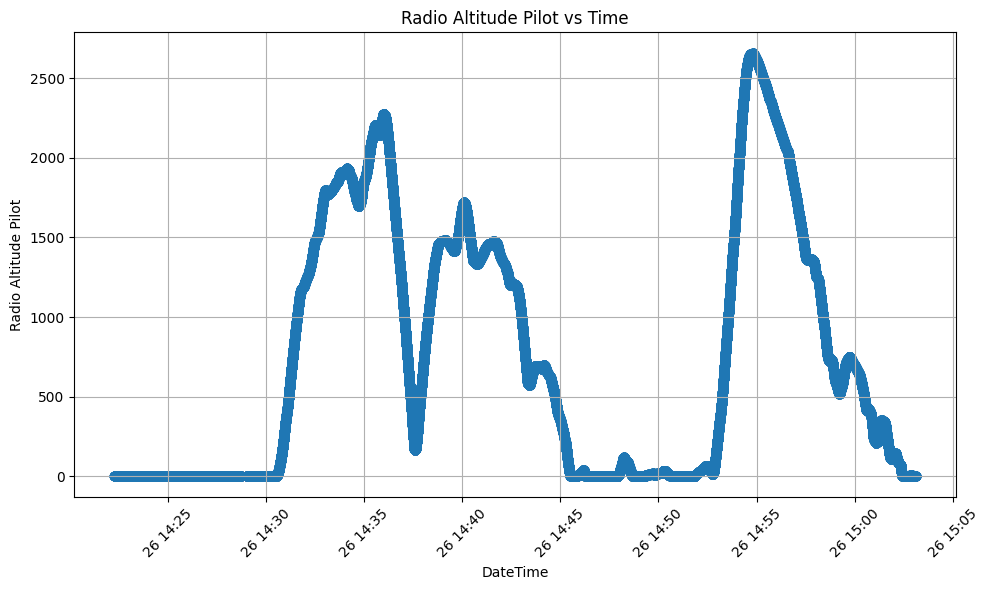

In [405]:
# Plot scatter plot for 'altitude' vs 'time'
plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Radio Altitude Pilot'])
plt.xlabel('DateTime')
plt.ylabel('Radio Altitude Pilot')
plt.title('Radio Altitude Pilot vs Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [406]:
high_alt_df = df[df["Altitude(AGL)"]>100]
low_alt_df = df[df["Altitude(AGL)"]<=100]

def is_close_to_zero(number, tolerance=1):
    return abs(number) <=tolerance

def identify_phase(vertical_speed, ground_speed, altitude):
    if is_close_to_zero(vertical_speed) and ground_speed < 0.6 and 0 <= altitude < 2:
        return "Standing"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 20 and 0 <= altitude < 2:
        return "Surface Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 30 and 2 <= altitude < 25:
        return "Hover Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 50 and 25 <= altitude < 100:
        return "Air Taxi"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude < 2:
        return "Hover In Ground Effect"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude >= 100:
        return "Hover"
    elif vertical_speed > 90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Lift"
    elif vertical_speed < -90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Descent"
    elif vertical_speed > 90 and altitude >= 100:
        return "Climb"
    elif -90 <= vertical_speed <= 90 and ground_speed > 0.6 and altitude >= 100:
        return "Cruise"
    elif vertical_speed < -90 and altitude >= 100:
        return "Descent"
    else:
        return "Unknown Phase"


In [407]:
high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
high_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/3353146022.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/3353146022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Descent    33216
Climb      26588
Cruise      6263
Name: count, dtype: int64

In [408]:
low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
low_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/843019058.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/843019058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Standing                  28896
Unknown Phase             14819
Hover In Ground Effect     2985
Surface Taxi               1156
Hover Lift                   36
Hover Taxi                   19
Air Taxi                     12
Name: count, dtype: int64

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/1916102632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_phase['DateTime'] = unknown_phase['Date'] + ' '+ unknown_phase['System UTC Time'].astype(str)
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/1916102632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_phase['DateTime'] = pd.to_datetime(unknown_phase['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')


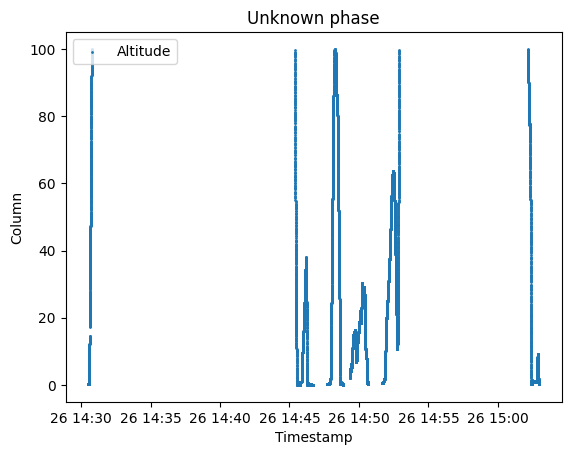

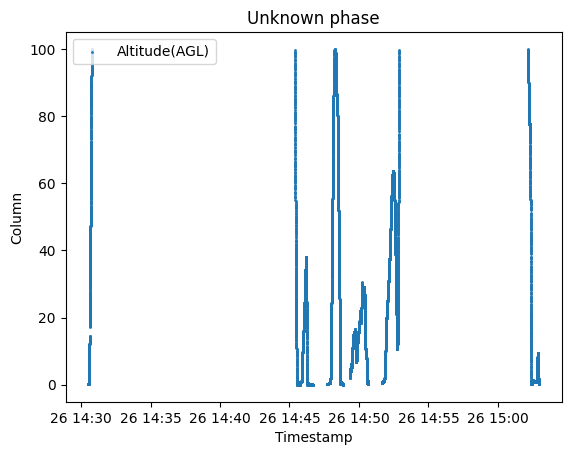

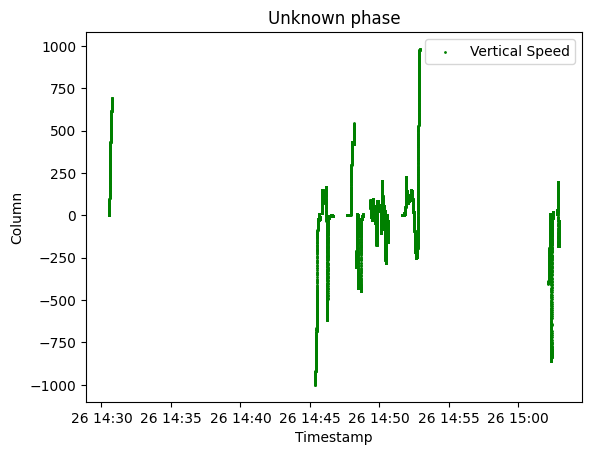

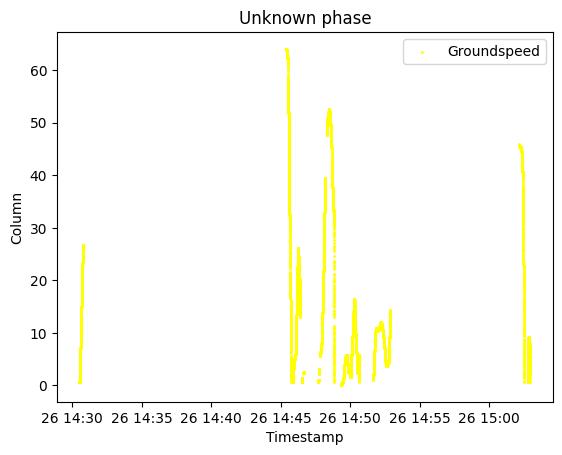

In [409]:
unknown_phase = low_alt_df[low_alt_df['phase']=='Unknown Phase']

unknown_phase['DateTime'] = unknown_phase['Date'] + ' '+ unknown_phase['System UTC Time'].astype(str)
unknown_phase['DateTime'] = pd.to_datetime(unknown_phase['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Radio Altitude Pilot'], label='Altitude', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Vert. Speed'], color='green', label='Vertical Speed', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Groundspeed'], color='yellow', label='Groundspeed', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()


/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/2978358031.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


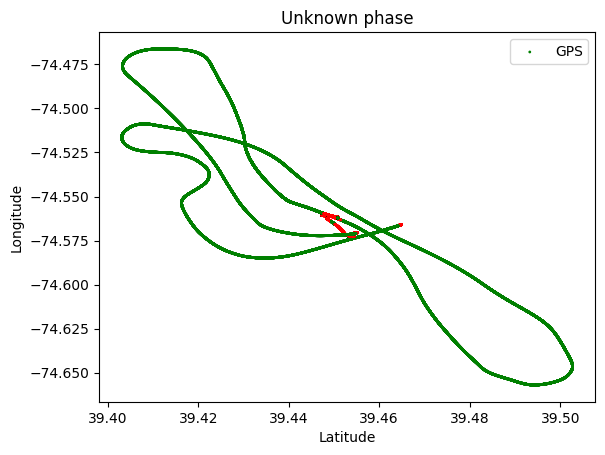

In [410]:
df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)

def color_phase(phase):
    if phase == "Unknown Phase":
        return 'red'
    else:
        return 'green'
# Create an array of colors based on the 'status' column
colors = df['phase'].map(color_phase)

plt.figure()
plt.scatter(df['Latitude'], df['Longitude'], c=colors, label='GPS', s=1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Unknown phase")
plt.legend()
plt.show()


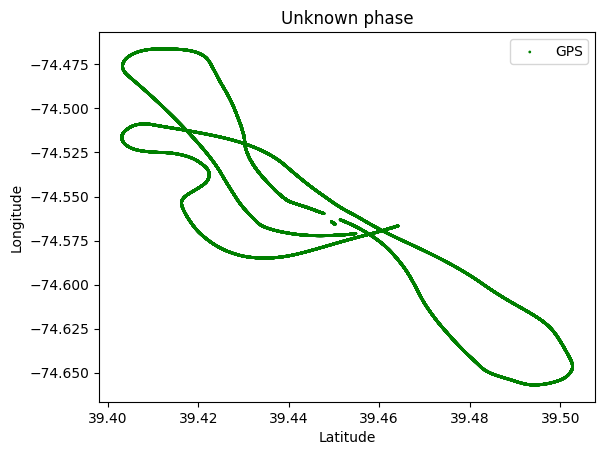

In [411]:
colors = high_alt_df['phase'].map(color_phase)
plt.figure()
plt.scatter(high_alt_df['Latitude'], high_alt_df['Longitude'], c=colors, label='GPS', s=1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Unknown phase")
plt.legend()
plt.show()

In [412]:
unknown_phase

,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning,DateTime,phase
23580,476.036,01/26/2023,14:30:30.625,39.464849,-74.565965,57.83,0.31,219.974,207.673,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 14:30:30.625,Unknown Phase
23581,476.054,01/26/2023,14:30:30.643,39.464849,-74.565965,57.83,0.31,219.977,207.677,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 14:30:30.643,Unknown Phase
23582,476.074,01/26/2023,14:30:30.663,39.464849,-74.565965,57.83,0.31,219.980,207.680,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 14:30:30.663,Unknown Phase
23583,476.095,01/26/2023,14:30:30.684,39.464849,-74.565965,57.83,0.31,219.984,207.684,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 14:30:30.684,Unknown Phase
23584,476.113,01/26/2023,14:30:30.702,39.464849,-74.565965,57.83,0.32,219.989,207.688,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 14:30:30.702,Unknown Phase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113589,2423.414,01/26/2023,15:02:58.003,39.450844,-74.562159,61.21,0.23,314.218,301.918,-0.278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 15:02:58.003,Unknown Phase
113590,2423.435,01/26/2023,15:02:58.024,39.450844,-74.562160,61.19,0.22,314.245,301.946,-0.277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 15:02:58.024,Unknown Phase
113591,2423.457,01/26/2023,15:02:58.045,39.450844,-74.562160,61.18,0.21,314.284,301.984,-0.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 15:02:58.045,Unknown Phase
113592,2423.487,01/26/2023,15:02:58.075,39.450844,-74.562160,61.16,0.19,314.361,302.061,-0.304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-26 15:02:58.075,Unknown Phase


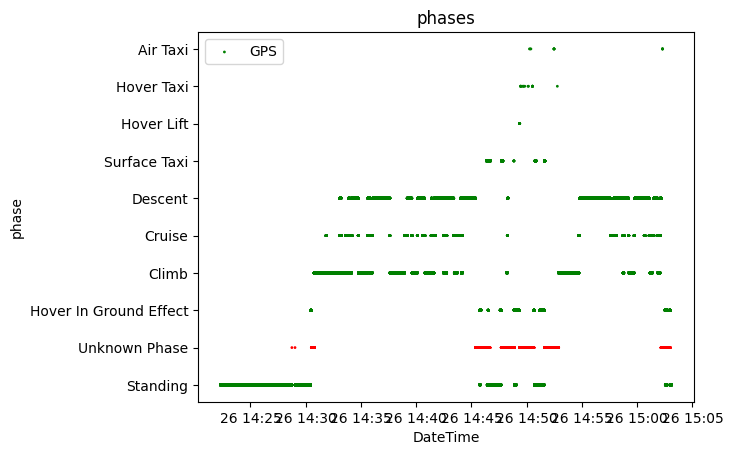

In [413]:
def color_phase(phase):
    if phase == "Unknown Phase":
        return 'red'
    else:
        return 'green'
# Create an array of colors based on the 'status' column
colors = df['phase'].map(color_phase)

plt.figure()
plt.scatter(df['DateTime'], df['phase'], c=colors, label='GPS', s=1)
plt.xlabel('DateTime')
plt.ylabel('phase')
plt.title("phases")
plt.legend()
plt.show()

In [414]:
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df["hourMinute"] = df["hour"].astype(str)+':'+df["minute"].astype(str)

df[df["phase"]=="Unknown Phase"]["hourMinute"].unique()


/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/221857373.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = df['DateTime'].dt.hour
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/221857373.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['minute'] = df['DateTime'].dt.minute
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/221857373.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

array(['14:28', '14:29', '14:30', '14:45', '14:46', '14:47', '14:48',
       '14:49', '14:50', '14:51', '14:52', '15:2'], dtype=object)

After inspecting the flight log:
14:28 - 14:30 is a Takeoff
14:45 - 14:52 is a Landing
15:02 is another Landing


In [415]:
def identify_phase(vertical_speed, ground_speed, altitude):
    if is_close_to_zero(vertical_speed) and ground_speed < 0.6 and 0 <= altitude < 2:
        return "Standing"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 20 and 0 <= altitude < 2:
        return "Surface Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 30 and 2 <= altitude < 25:
        return "Hover Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 50 and 25 <= altitude < 100:
        return "Air Taxi"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude < 2:
        return "Hover In Ground Effect"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude >= 100:
        return "Hover"
    elif vertical_speed > 90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Lift"
    elif vertical_speed < -90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Descent"
    elif vertical_speed > 90 and altitude >= 100:
        return "Climb"
    elif -90 <= vertical_speed <= 90 and ground_speed > 0.6 and altitude >= 100:
        return "Cruise"
    elif vertical_speed < -90 and altitude >= 100:
        return "Descent"
    else:
        return "LandingOrTakeOff"

In [416]:
high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
high_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/311764017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Descent    33216
Climb      26588
Cruise      6263
Name: count, dtype: int64

In [417]:
low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
low_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/874579766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Standing                  28896
LandingOrTakeOff          14819
Hover In Ground Effect     2985
Surface Taxi               1156
Hover Lift                   36
Hover Taxi                   19
Air Taxi                     12
Name: count, dtype: int64

In [418]:
df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
df["phase"].value_counts()

phase
Descent                   33216
Standing                  28896
Climb                     26588
LandingOrTakeOff          14821
Cruise                     6263
Hover In Ground Effect     2985
Surface Taxi               1156
Hover Lift                   36
Hover Taxi                   19
Air Taxi                     12
Name: count, dtype: int64